In [35]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [36]:
def random_initialization(x0, xn, n):
    x = np.zeros((n+1, 2)) 
    x[0] = x0
    x[-1] = xn
    for i in range(1, n):
        x[i] = np.random.uniform(low=x0, high=xn)
    return x

In [48]:
n = 20
k = 100 
x0 = np.array([0, 0])
xn = np.array([20, 20])
r = np.random.uniform(0, 20, (k, 2))
lambda1 = 1
lambda2 = 1
epsilon = 1e-13
num_iterations = 40
# x = np.linspace(x0, xn, n+1)
x = random_initialization(x0, xn, n)

In [38]:
def compute_F(x, r, lambda1, lambda2):
    term1 = sum(1 / (np.linalg.norm(x[i] - r[j])**2 + epsilon) for i in range(1, n) for j in range(k))
    term2 = sum(np.linalg.norm(x[i+1] - x[i])**2 for i in range(n))
    return lambda1 * term1 + lambda2 * term2

In [39]:
def compute_gradient(x, r, lambda1, lambda2):
    grad = np.zeros_like(x)  
    for i in range(1, n):   
        term1_grad = np.zeros(2)
        for j in range(k):
            term1_grad += (x[i] - r[j]) / (np.linalg.norm(x[i] - r[j])**2 + epsilon)**2
        term1_grad *= -2 * lambda1

        term2_grad = np.zeros(2)
        if i > 0:
            term2_grad += 2 * lambda2 * (x[i] - x[i-1])
        if i < n:
            term2_grad += 2 * lambda2 * (x[i] - x[i+1])

        grad[i] = term1_grad + term2_grad
    return grad

In [40]:
def golden_section_search(func, a, b, tol=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    while (b - a) > tol:
        c = b - (b - a) / phi
        d = a + (b - a) / phi
        if func(c) < func(d):
            b = d
        else:
            a = c
    return (b + a) / 2

In [41]:
def gradient_descent_with_line_search(x, r, lambda1, lambda2, num_iterations):
    history = []
    frames = []
    for i in range(num_iterations):
        grad = compute_gradient(x, r, lambda1, lambda2)
        
        # Funkcja do minimalizacji wzdłuż kierunku przeciwnym do gradientu
        def line_search_func(alpha):
            new_x = x.copy()
            new_x[1:n] = new_x[1:n] - alpha * grad[1:n]
            return compute_F(new_x, r, lambda1, lambda2)
        
        alpha = golden_section_search(line_search_func, 0, 1) 
        
        x[1:n] = x[1:n] - alpha * grad[1:n]
        
        history.append(compute_F(x, r, lambda1, lambda2))
        # Tworzenie wykresu dla bieżącej iteracji
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(r[:, 0], r[:, 1], 'ro', label='Przeszkody')
        ax.plot(x[:, 0], x[:, 1], 'b-', marker='o', label='Optymalna Ścieżka')
        ax.plot(x[0, 0], x[0, 1], 'go', markersize=10, label='Start')
        ax.plot(x[-1, 0], x[-1, 1], 'bo', markersize=10, label='Koniec')
        # Dodanie strzałek przeciwnych do gradientu
        for j in range(1, n):
            ax.quiver(x[j, 0], x[j, 1], -grad[j, 0], -grad[j, 1], angles='xy', scale_units='xy', scale=10, color='g', alpha=0.5, width=0.003)
            
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Optymalna Ścieżka dla Robota')
        ax.legend()
        ax.grid(True)
        
        # Zapisanie wykresu do bufora
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(image)
        plt.close(fig)
        print(i/num_iterations)
        print(len(frames))
    imageio.mimsave('optimal_path.gif', frames, fps=2)
    return x, history

In [49]:
optimal_path, history = gradient_descent_with_line_search(x, r, lambda1, lambda2, num_iterations)

0.0
1
0.025
2
0.05
3
0.075
4
0.1
5
0.125
6
0.15
7
0.175
8
0.2
9
0.225
10
0.25
11
0.275
12
0.3
13
0.325
14
0.35
15
0.375
16
0.4
17
0.425
18
0.45
19
0.475
20
0.5
21
0.525
22
0.55
23
0.575
24
0.6
25
0.625
26
0.65
27
0.675
28
0.7
29
0.725
30
0.75
31
0.775
32
0.8
33
0.825
34
0.85
35
0.875
36
0.9
37
0.925
38
0.95
39
0.975
40


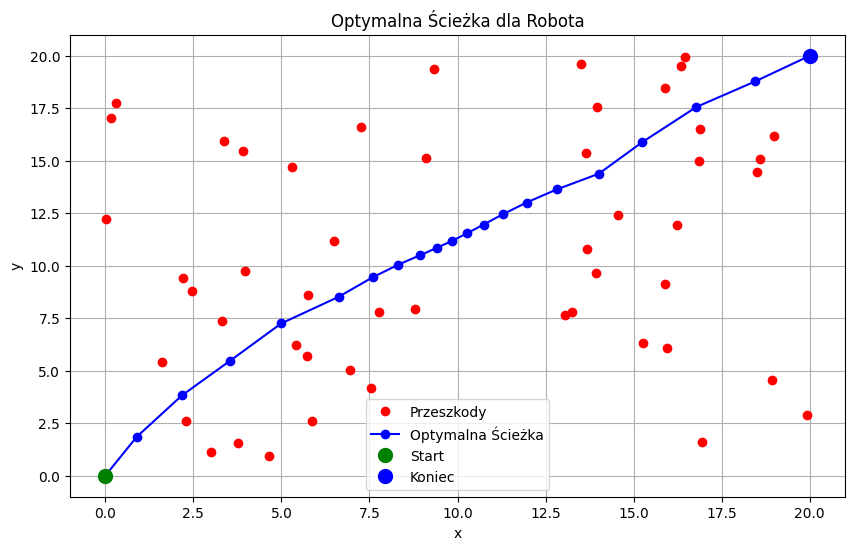

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(r[:, 0], r[:, 1], 'ro', label='Przeszkody')
plt.plot(optimal_path[:, 0], optimal_path[:, 1], 'b-', marker='o', label='Optymalna Ścieżka')
plt.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
plt.plot(xn[0], xn[1], 'bo', markersize=10, label='Koniec')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optymalna Ścieżka dla Robota')
plt.legend()
plt.grid(True)
plt.show()

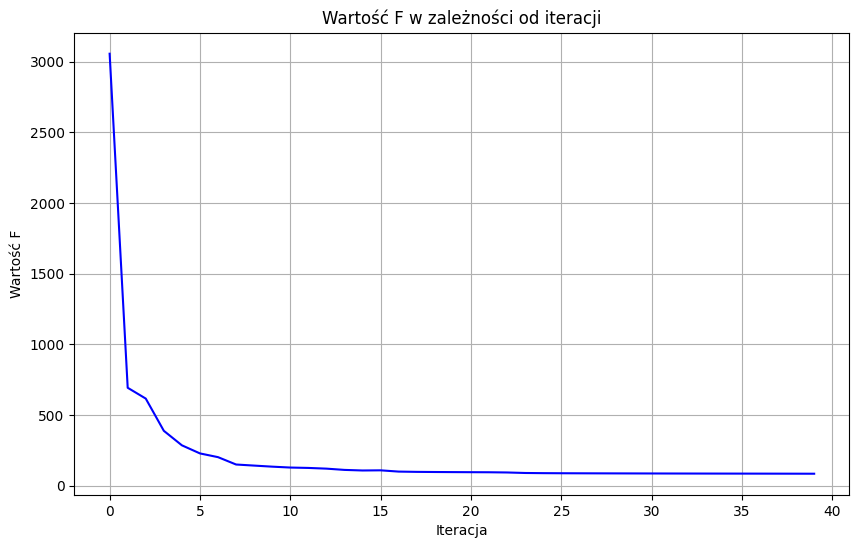

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(history, 'b-')
plt.xlabel('Iteracja')
plt.ylabel('Wartość F')
plt.title('Wartość F w zależności od iteracji')
plt.grid(True)
plt.show()

In [45]:
histories = []

In [46]:
histories.append(history)

IndexError: list index out of range

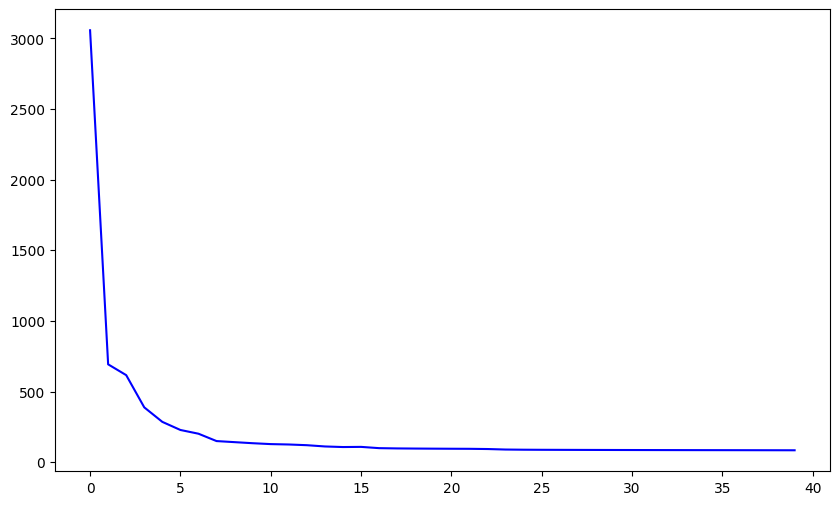

In [47]:
# draw plots with all histories 
plt.figure(figsize=(10, 6))
plt.plot(histories[0], 'b-')
plt.plot(histories[1], 'r--')
plt.plot(histories[2], 'g-.')
plt.plot(histories[3], 'm:')
plt.legend(["Ścieżka 1", "Ścieżka 3", "Ścieżka 4", "Ścieżka 5"])
plt.xlabel('Iteracja')
plt.ylabel('Wartość F')
plt.title('Wartość F w zależności od iteracji')
plt.grid(True)
plt.show()